In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report


# Data Loading


In [2]:
data = pd.read_csv(r'C:\Users\USER\Documents\forest_cover_prediction\forest_cover_prediction\train.csv')
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [3]:
data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
data.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

In [5]:
df = data.drop('Id', axis = 'columns')
df.sample(5)       

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
13998,2587,27,13,67,5,1865,214,212,132,2024,...,0,0,0,0,0,0,0,0,0,6
8084,2765,159,7,212,35,2616,227,241,148,2068,...,0,0,0,0,0,0,0,0,0,5
11600,2590,9,9,330,45,484,211,223,149,1100,...,0,0,0,0,0,0,0,0,0,2
6496,3269,113,13,576,133,518,242,226,110,1012,...,0,0,0,0,0,0,0,1,0,7
11689,2875,63,12,323,43,2039,230,215,116,2324,...,0,0,0,0,0,0,0,0,0,2


In [10]:
def print_unique_col_values(df):    
    for col in df:
        print(f'{col}:{df[col].unique()}')

print_unique_col_values(df)

Elevation:[2596 2590 2804 ... 3504 3510 3604]
Aspect:[ 51  56 139 155  45 132  49  59 201 151 134 214 157 259  72   0  38  71
 209 114  54  22 135 163 148 117 122 105 102  23  41 125  92  98 354 347
 346 330 128  68  94  99  66 100 323  79  81 315  74  11  42  75 107  90
  40  63  13  80 166   6  30 118 160 326 153 143 352  14 358 332  18 306
 173  31 164  34  84 170 211  32  57 348 333 324  88 111  53  58  76  17
 124 119 320 112  83   1  37 356 307   7  12 344 228 284 299 220   2  95
 289  21  20 200 349 328 221 257 276 196 189 130 357  15   8 288 129  28
  86 292 115  29 180 116  46 256 338 127 319  89  43 188  50 138 312   9
  10  36 167 260 187 279 245  27 359  16  48 149  60  77 230 152  70 325
 126 222 109  85  25 176 144 175 162  73  39  78 331 329 355  87 285 108
 106  24  52 261 232 246 342  61 141 216 236 254 336 278  62 237 281  69
 251 150 185 110 103 243 215 238 317 252 136 131 133 123 120 351 202 194
 101 282 258 270  65 203 353 174 140 142 267   5 343 104 212 198 263 27

In [16]:
df.columns
def identify_binary_columns(df):
    """
    #Find columns that have exactly 2 unique values
    Returns list of binary column names
    """
    binary_columns = []
    
    for column in df.columns:
        n_unique = df[column].nunique()
        if n_unique == 2:
            binary_columns.append(column)
            print(f"Binary column: {column}")
            print(f"Unique values: {df[column].unique()}")
            print("-" * 40)
    
    return binary_columns

# Get binary columns
binary_cols = identify_binary_columns(df)

# Print summary
print(f"\nTotal binary columns found: {len(binary_cols)}")
print("\nBinary columns list:")
print(binary_cols)


Binary column: Wilderness_Area1
Unique values: [1 0]
----------------------------------------
Binary column: Wilderness_Area2
Unique values: [0 1]
----------------------------------------
Binary column: Wilderness_Area3
Unique values: [0 1]
----------------------------------------
Binary column: Wilderness_Area4
Unique values: [0 1]
----------------------------------------
Binary column: Soil_Type1
Unique values: [0 1]
----------------------------------------
Binary column: Soil_Type2
Unique values: [0 1]
----------------------------------------
Binary column: Soil_Type3
Unique values: [0 1]
----------------------------------------
Binary column: Soil_Type4
Unique values: [0 1]
----------------------------------------
Binary column: Soil_Type5
Unique values: [0 1]
----------------------------------------
Binary column: Soil_Type6
Unique values: [0 1]
----------------------------------------
Binary column: Soil_Type8
Unique values: [0 1]
----------------------------------------
Binary c

In [18]:
non_binary_cols = [col for col in df.columns if col not in binary_cols]
print("Non-binary columns:", non_binary_cols)

Non-binary columns: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Soil_Type7', 'Soil_Type15', 'Cover_Type']


In [22]:
remove_columns =   ['Soil_Type7', 'Soil_Type15','Cover_Type']
col_to_scale = list(set(non_binary_cols) - set(remove_columns))
print("Columns to scale:", col_to_scale)

Columns to scale: ['Aspect', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Horizontal_Distance_To_Fire_Points', 'Slope', 'Vertical_Distance_To_Hydrology', 'Hillshade_3pm', 'Horizontal_Distance_To_Hydrology', 'Hillshade_Noon', 'Elevation']


In [27]:
scaler = MinMaxScaler()
df[col_to_scale] = scaler.fit_transform(df[col_to_scale])
df.sample(3)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
5643,0.215005,0.241667,0.346154,0.044676,0.258571,0.052250,0.960630,0.696774,0.350806,0.230373,...,0,0,0,0,0,0,0,0,0,4
8108,0.701410,0.255556,0.500000,0.063291,0.231429,0.330189,0.984252,0.587097,0.213710,0.091806,...,0,0,0,0,0,0,0,1,0,7
8694,0.430010,0.936111,0.538462,0.190618,0.360000,0.260813,0.582677,0.580645,0.697581,0.363506,...,0,0,0,0,0,0,0,0,0,6


In [28]:
df['Cover_Type'].value_counts()

Cover_Type
5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: count, dtype: int64

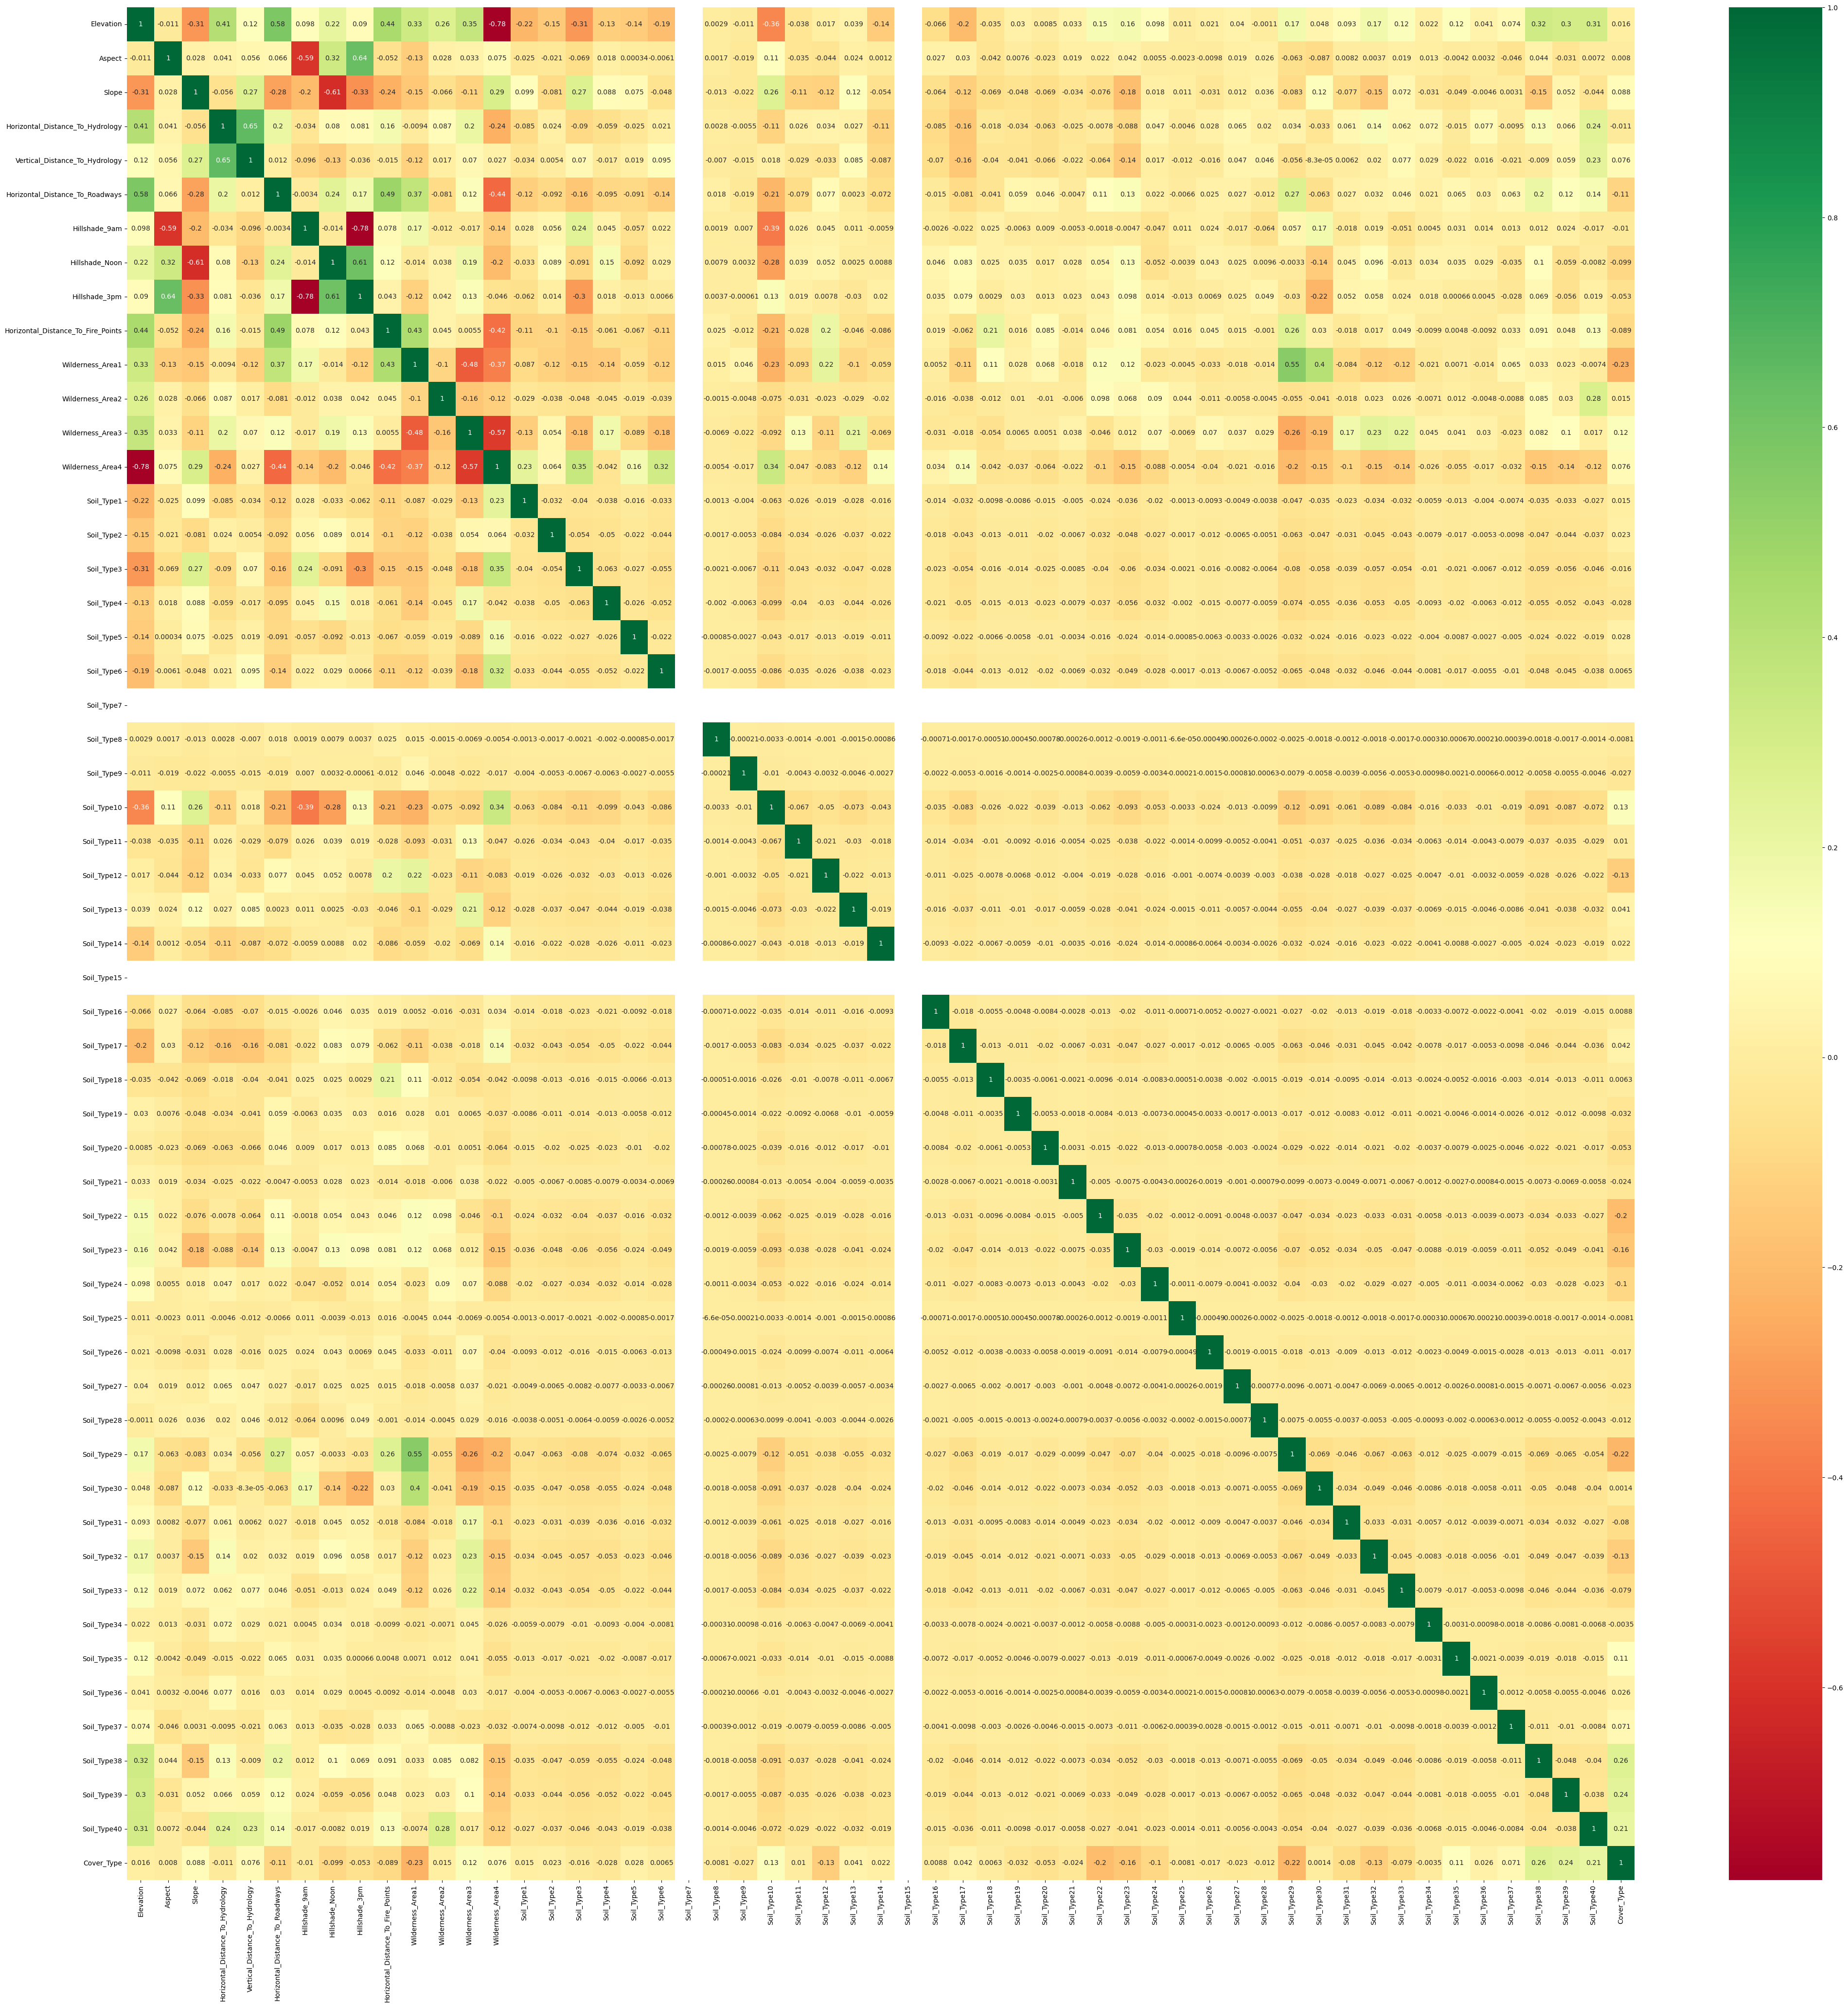

In [29]:
cor=df.corr()
feature=cor.index
plt.figure(figsize=(50,50))
g=sns.heatmap(df[feature].corr(),annot=True,cmap="RdYlGn")

# Split features and target

In [31]:

X = df.drop('Cover_Type', axis=1)  # Assuming 'Cover_Type' is target
y = df['Cover_Type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create base models

In [32]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

# Create voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('gb', gb),
        ('lr', lr)
    ],
    voting='soft'
)

# Train the ensemble
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.fit(X_train, y_train).predict(X_test)

# Print results
print("Ensemble Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# Individual model performances
models = {'Random Forest': rf, 'Gradient Boosting': gb, 'Logistic Regression': lr}
for name, model in models.items():
    print(f"\n{name} Performance:")
    y_pred = model.fit(X_train, y_train).predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))

Ensemble Model Performance:
Accuracy: 0.8290343915343915

Detailed Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.76      0.75       421
           2       0.78      0.63      0.70       438
           3       0.80      0.75      0.78       428
           4       0.89      0.98      0.93       449
           5       0.84      0.92      0.88       416
           6       0.80      0.80      0.80       432
           7       0.94      0.95      0.95       440

    accuracy                           0.83      3024
   macro avg       0.83      0.83      0.83      3024
weighted avg       0.83      0.83      0.83      3024


Random Forest Performance:
Accuracy: 0.8726851851851852

Gradient Boosting Performance:
Accuracy: 0.8025793650793651

Logistic Regression Performance:
Accuracy: 0.6822089947089947
